In [1]:
from tensorflow import keras
L = keras.layers
from vaes import VAE, decaying
from utils import evaluate

2023-07-05 00:10:39.989625: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 00:10:40.278326: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 00:10:40.280261: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 00:10:42.590502: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

In [3]:
def encoding_stack():
   return keras.Sequential(
        [
            L.Conv2D(32, 5, activation='leaky_relu'),
            L.Conv2D(32, 5, activation='leaky_relu'),
            L.MaxPooling2D(),
            L.Conv2D(32, 5, activation='leaky_relu'),
            L.Flatten(),
        ],
        name='encoder_conv_stack'
    )
def decoding_stack():
  return keras.Sequential(
        [
            L.Dense(6*6*32, activation='leaky_relu'),
            L.Reshape((6,6,32)),
            L.Conv2DTranspose(32,5, activation='leaky_relu'),
            L.UpSampling2D(),
            L.Conv2DTranspose(16,5, activation='leaky_relu'),
            L.Conv2DTranspose(1,5, activation='leaky_relu'),
            L.Dense(1, activation='sigmoid'),
        ],
        name='decoder_conv_stack'
    )
with_classifier = VAE(
    (28,28,1),
    encoding_stack(),
    decoding_stack(),
    classify=True,
    decay_function=decaying(4000, 20, .1, -0.1)
)
without_classifier = VAE(
    (28,28,1),
    encoding_stack(),
    decoding_stack(),
    classify=False,
)


In [4]:
with_classifier.compile()
with_classifier.fit(x_train[:300], y_train[:300], batch_size=64, epochs=10)

Epoch 1/10


2023-07-05 00:10:56.286892: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16358400 exceeds 10% of free system memory.
2023-07-05 00:10:56.329175: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27520000 exceeds 10% of free system memory.
2023-07-05 00:10:56.469986: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18892800 exceeds 10% of free system memory.
2023-07-05 00:10:56.479834: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18892800 exceeds 10% of free system memory.
2023-07-05 00:10:56.517598: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27520000 exceeds 10% of free system memory.


5/5 [==============================] - 6s 403ms/step - loss: 224.4182 - reconstruction_loss: 178.0604 - kl_divergence_loss: 0.1873 - classification_accuracy: 0.1158 - classification_loss: 2.3085 - classification_weight: 20.0000
Epoch 2/10
5/5 [==============================] - 1s 249ms/step - loss: 208.4457 - reconstruction_loss: 156.3697 - kl_divergence_loss: 6.1427 - classification_accuracy: 0.1212 - classification_loss: 2.2967 - classification_weight: 20.0000
Epoch 3/10
5/5 [==============================] - 1s 224ms/step - loss: 175.2848 - reconstruction_loss: 128.2653 - kl_divergence_loss: 1.3492 - classification_accuracy: 0.1214 - classification_loss: 2.2835 - classification_weight: 20.0000
Epoch 4/10
5/5 [==============================] - 1s 203ms/step - loss: 152.5936 - reconstruction_loss: 103.4786 - kl_divergence_loss: 2.1577 - classification_accuracy: 0.0982 - classification_loss: 2.3479 - classification_weight: 20.0000
Epoch 5/10
5/5 [==============================] - 1s 19

In [6]:
without_classifier.compile()
without_classifier.fit(x_train[:300], y_train[:300], batch_size=64, epochs=10)

Epoch 1/10
5/5 [==============================] - 4s 240ms/step - loss: 49.6715 - reconstruction_loss: 48.1273 - kl_divergence_loss: 1.5443
Epoch 2/10
5/5 [==============================] - 1s 240ms/step - loss: 47.0222 - reconstruction_loss: 45.5105 - kl_divergence_loss: 1.5117
Epoch 3/10
5/5 [==============================] - 1s 227ms/step - loss: 45.3672 - reconstruction_loss: 43.7962 - kl_divergence_loss: 1.5711
Epoch 4/10
5/5 [==============================] - 1s 224ms/step - loss: 46.1685 - reconstruction_loss: 44.4866 - kl_divergence_loss: 1.6819
Epoch 5/10
5/5 [==============================] - 1s 208ms/step - loss: 45.1926 - reconstruction_loss: 43.6195 - kl_divergence_loss: 1.5731
Epoch 6/10
5/5 [==============================] - 1s 223ms/step - loss: 45.6332 - reconstruction_loss: 43.9547 - kl_divergence_loss: 1.6785
Epoch 7/10
5/5 [==============================] - 1s 244ms/step - loss: 46.1515 - reconstruction_loss: 44.5767 - kl_divergence_loss: 1.5748
Epoch 8/10
5/5 [====

1/1 [==============================] - 0s 119ms/step
vars = array([[0.77097416, 0.7785204 ]], dtype=float32)
313/313 [==============================] - 4s 12ms/step


1/1 [==============================] - 1s 678ms/step


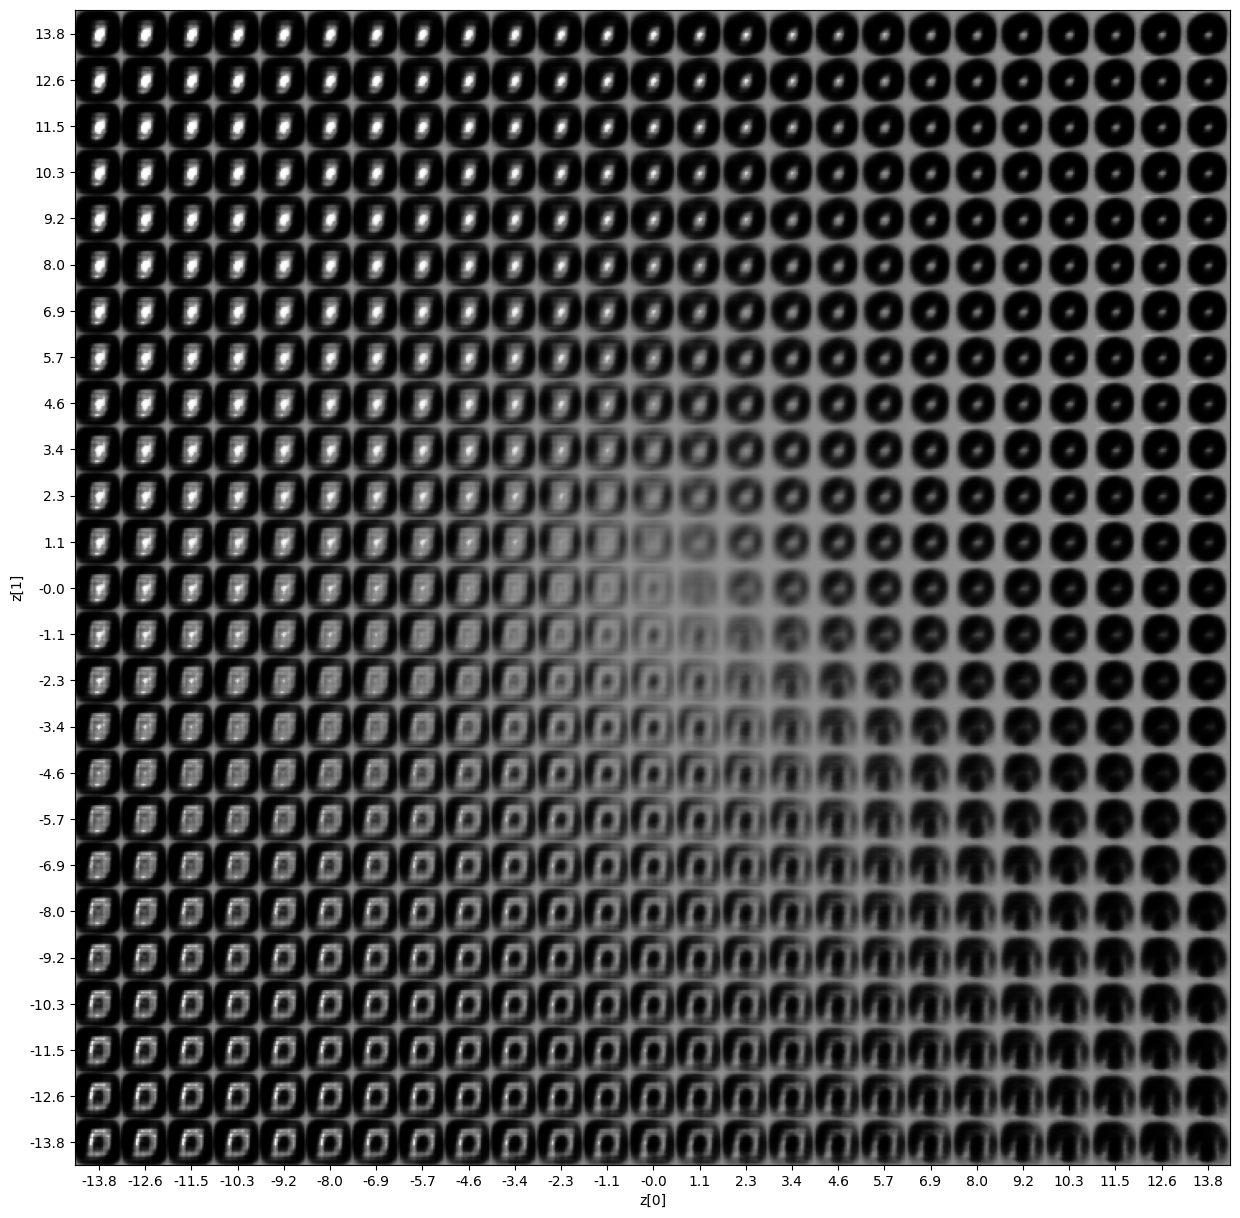

In [7]:
evaluate(with_classifier, x_test, y_test)

1/1 [==============================] - 0s 127ms/step
vars = array([[0.21025014, 0.2192828 ]], dtype=float32)
313/313 [==============================] - 5s 16ms/step


1/1 [==============================] - 0s 497ms/step


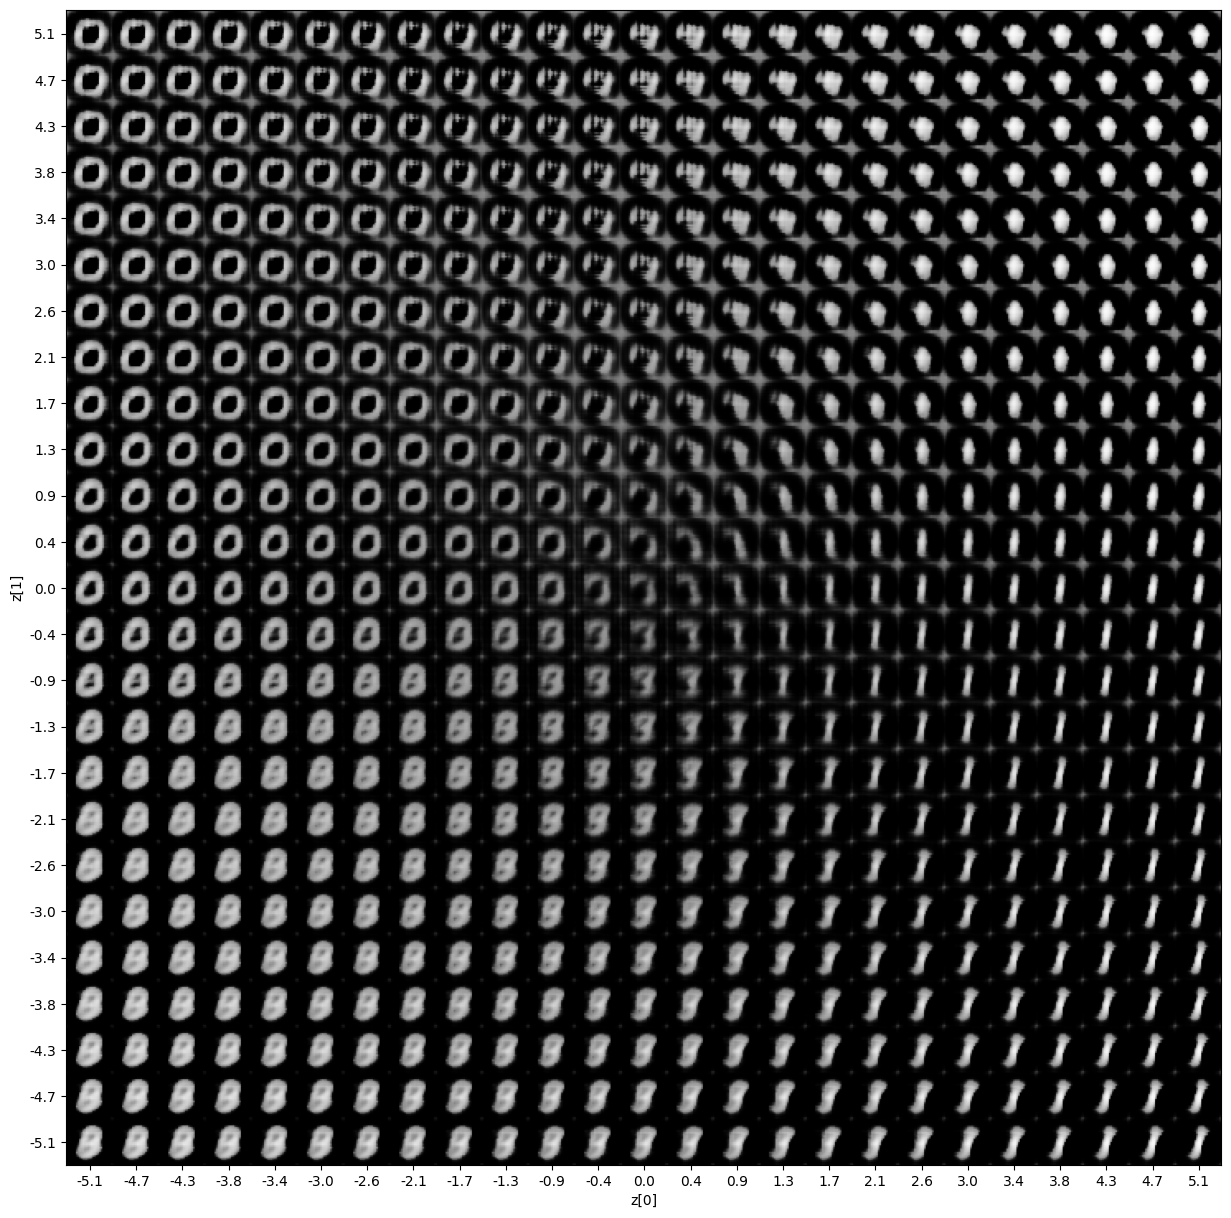

In [9]:
evaluate(without_classifier, x_test, y_test)